In [2]:
import torch

In [3]:
print(torch.__version__)

2.5.1


Using device: cuda
Epoch [100/1000], Loss: 0.1404
Epoch [200/1000], Loss: 0.0113
Epoch [300/1000], Loss: 0.0008
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


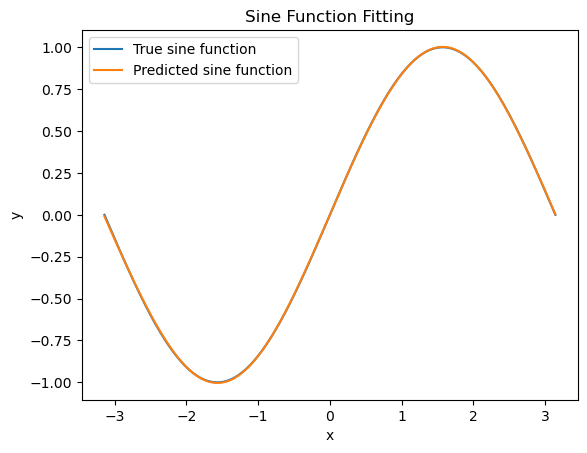

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 检查 CUDA 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 生成训练数据
x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)

# 将数据转换为 PyTorch 张量并移动到 GPU
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

# 定义简单的线性网络模型
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.GELU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 初始化模型并移动到 GPU
model = SimpleLinearModel().to(device)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 将模型输出移到 CPU 并转换为 NumPy 数组
with torch.no_grad():
    predicted = model(x_tensor).cpu().numpy()

# 可视化结果
plt.plot(x, y, label='True sine function')
plt.plot(x, predicted, label='Predicted sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Function Fitting')
plt.legend()
plt.show()

In [5]:
!conda install -c conda-forge transformers -y

Channels:
 - conda-forge
 - https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge
 - defaults
Platform: linux-64
doneecting package metadata (repodata.json): - 
doneing environment: | 

# All requested packages already installed.



In [6]:
import transformers

In [7]:
print(transformers.__version__)

4.49.0
